In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/thesis-datasets/final_dataset.csv')

In [2]:
df.describe()

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits_veg_nuts_100g
count,58730.000000,58730.000000,58730.000000,58730.000000,58730.000000,58730.000000,58730.000000
mean,159.668067,0.212143,6.799040,0.189730,0.732162,0.126550,18.347907
std,92.627194,0.695612,4.510136,0.546992,1.341085,0.742734,31.610606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,170.000000,0.000000,7.140000,0.000000,0.200000,0.017000,0.000000
75%,213.000000,0.100000,10.400000,0.028600,0.667000,0.100000,21.428571
max,499.000000,20.000000,25.000000,10.000000,10.000000,15.000000,100.000000


In [3]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = [
    'energy_100g',
     'saturated_fat_100g',
     'sugars_100g',
     'fiber_100g',
     'proteins_100g',
     'salt_100g',
     'fruits_veg_nuts_100g']

scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits_veg_nuts_100g,nutriscore_grade
0,-1.723786,-0.304976,-0.177167,17.935093,6.165091,-0.170385,-0.58044,b
1,1.126374,-0.304976,1.929217,-0.346863,-0.396818,-0.170385,-0.58044,e
2,2.195183,0.106176,-1.349204,2.267456,1.795456,0.407215,-0.58044,c
3,-0.590200,1.132618,-0.398892,-0.346863,3.182405,10.600719,-0.58044,e
4,0.176320,-0.304976,-1.285790,-0.346863,-0.545952,-0.170385,-0.58044,c


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df["label_encoded"] = label_encoder.fit_transform(df["nutriscore_grade"])

# Text Data Part

In [5]:
columns_to_include = [
    'energy_100g',
     'saturated_fat_100g',
     'sugars_100g',
     'fiber_100g',
     'proteins_100g',
     'salt_100g',
     'fruits_veg_nuts_100g']

df["text"] = df[columns_to_include].apply(lambda row: ','.join(f"{col}:{int(row[col]) if row[col] % 1 == 0 else row[col]}" for col in columns_to_include), axis=1)

In [6]:
df.head()

,energy_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits_veg_nuts_100g,nutriscore_grade,label_encoded,text
0,-1.723786,-0.304976,-0.177167,17.935093,6.165091,-0.170385,-0.58044,b,0,"energy_100g:-1.7237856339955322,saturated_fat_..."
1,1.126374,-0.304976,1.929217,-0.346863,-0.396818,-0.170385,-0.58044,e,3,"energy_100g:1.1263735464834135,saturated_fat_1..."
2,2.195183,0.106176,-1.349204,2.267456,1.795456,0.407215,-0.58044,c,1,"energy_100g:2.195183239163018,saturated_fat_10..."
3,-0.590200,1.132618,-0.398892,-0.346863,3.182405,10.600719,-0.58044,e,3,"energy_100g:-0.5901995963050424,saturated_fat_..."
4,0.176320,-0.304976,-1.285790,-0.346863,-0.545952,-0.170385,-0.58044,c,1,"energy_100g:0.17632048632376487,saturated_fat_..."


In [7]:
print(df['text'].iloc[1])

energy_100g:1.1263735464834135,saturated_fat_100g:-0.3049759269800827,sugars_100g:1.9292173904316159,fiber_100g:-0.34686332207932363,proteins_100g:-0.3968180656360546,salt_100g:-0.17038546289604137,fruits_veg_nuts_100g:-0.5804401075176878


In [8]:
df['text'] = df['text'].astype(str)
df['text'] = df['text'].fillna('')

In [9]:
df.columns.tolist()

['energy_100g',
 'saturated_fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'fruits_veg_nuts_100g',
 'nutriscore_grade',
 'label_encoded',
 'text']

In [10]:
X = df['text']
y = df['label_encoded']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["text"] = df["text"].astype(str)

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    ngram_range=(1, 2)
)

# Convert text data to TF-IDF vectors
X_tfidf = tfidf_vectorizer.fit_transform(df["text"])

In [12]:
X_tfidf_dense = X_tfidf.toarray()

In [13]:
from sklearn.model_selection import train_test_split

X_train_NLP, X_test_NLP, y_train, y_test = train_test_split(X_tfidf_dense, y, test_size=0.2, random_state=42)
X_train_NLP.shape, X_test_NLP.shape, y_train.shape, y_test.shape

((46984, 5000), (11746, 5000), (46984,), (11746,))

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
lr_model = LogisticRegression(max_iter=1000, 
                              solver='lbfgs', 
                              multi_class='multinomial')
lr_model.fit(X_train_NLP, y_train)
lr_preds = lr_model.predict(X_test_NLP)

print("Logistic Regression Metrics:")
print(classification_report(y_test, lr_preds))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2678
           1       0.77      0.78      0.78      3120
           2       0.74      0.63      0.68      1909
           3       0.86      0.94      0.90      4039

    accuracy                           0.82     11746
   macro avg       0.81      0.79      0.80     11746
weighted avg       0.82      0.82      0.82     11746



In [16]:
from lightgbm import LGBMClassifier
LightGBM_NLP = LGBMClassifier()
LightGBM_NLP.fit(X_train_NLP, y_train)
LightGBM_pred_NLP = LightGBM_NLP.predict(X_test_NLP)

print("\nClassification Report:")
print(classification_report(y_test, LightGBM_pred_NLP))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.324915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 144883
[LightGBM] [Info] Number of data points in the train set: 46984, number of used features: 2996
[LightGBM] [Info] Start training from score -1.484435
[LightGBM] [Info] Start training from score -1.325279
[LightGBM] [Info] Start training from score -1.801856
[LightGBM] [Info] Start training from score -1.071050

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2678
           1       0.75      0.74      0.74      3120
           2       0.75      0.57      0.65      1909
           3       0.81      0.93      0.87      4039

    accuracy                           0.79     11746
   macro avg       0.78      0.76      0.77     11746
weighted avg       0.79      0.79      0.79     11746



In [17]:
rf_model_NLP = RandomForestClassifier()
rf_model_NLP.fit(X_train_NLP, y_train)
rf_pred_NLP = rf_model_NLP.predict(X_test_NLP)

print("\nRF Classification Report:")
print(classification_report(y_test, rf_pred_NLP))


RF Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      2678
           1       0.72      0.73      0.72      3120
           2       0.75      0.54      0.63      1909
           3       0.78      0.91      0.84      4039

    accuracy                           0.77     11746
   macro avg       0.77      0.74      0.75     11746
weighted avg       0.77      0.77      0.76     11746



In [18]:
from sklearn.metrics import accuracy_score
import numpy as np

# Get individual model accuracies
acc1 = accuracy_score(y_test, lr_model.predict(X_test_NLP).astype(int))
acc2 = accuracy_score(y_test, LightGBM_NLP.predict(X_test_NLP).astype(int))
acc3 = accuracy_score(y_test, rf_model_NLP.predict(X_test_NLP).astype(int))

# Store them in a list
accuracies = np.array([acc1, acc2, acc3])

# Normalize to sum to 1
weights = accuracies / np.sum(accuracies)

print("Adjusted Weights:", weights)

Adjusted Weights: [0.34483869 0.33228414 0.32287717]


In [19]:
from sklearn.ensemble import VotingClassifier
import numpy as np

probabilities = np.array([
    lr_model.predict_proba(X_test_NLP),
    LightGBM_NLP.predict_proba(X_test_NLP),
    rf_model_NLP.predict_proba(X_test_NLP)
])

weighted_probabilities = np.average(probabilities, axis=0, weights=weights)
final_predictions = np.argmax(weighted_probabilities, axis=1)

accuracy = np.mean(final_predictions == y_test) * 100
print(f"Weighted Soft Voting Ensemble Accuracy: {accuracy:.2f}%")

Weighted Soft Voting Ensemble Accuracy: 81.31%


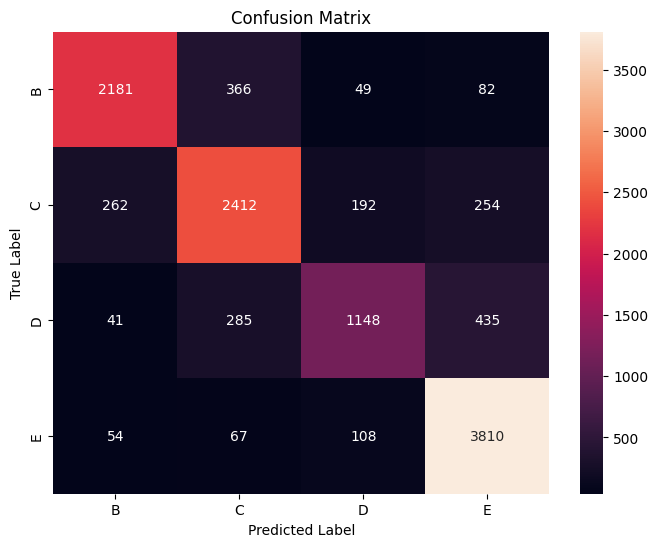

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, final_predictions), annot=True, fmt='d', xticklabels=['B', 'C', 'D', 'E'], yticklabels=['B', 'C', 'D', 'E'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

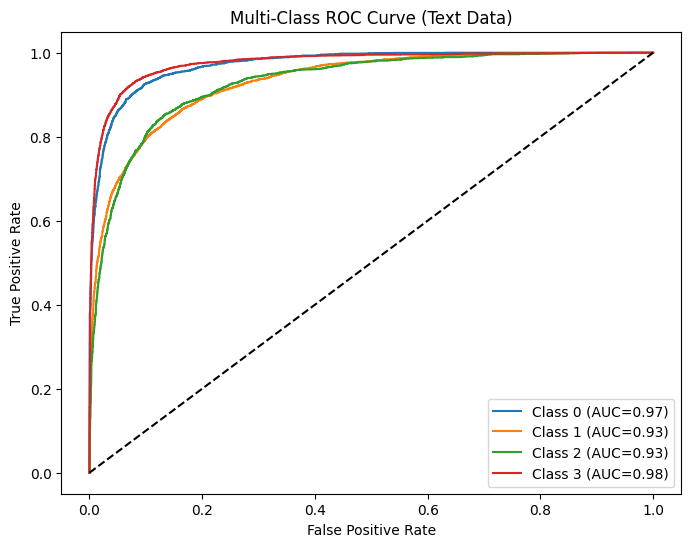

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities from the ensemble
y_score = weighted_probabilities  # The weighted probabilities from the ensemble

# Binarize labels (since it's multi-class)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC={auc(fpr, tpr):.2f})')

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (Text Data)')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import classification_report

# Get the classification report for the ensemble predictions
print("Classification Report:")
print(classification_report(y_test, final_predictions, target_names=['B', 'C', 'D', 'E'],  digits=4))

Classification Report:
              precision    recall  f1-score   support

           B     0.8593    0.8144    0.8363      2678
           C     0.7706    0.7731    0.7718      3120
           D     0.7669    0.6014    0.6741      1909
           E     0.8317    0.9433    0.8840      4039

    accuracy                         0.8131     11746
   macro avg     0.8071    0.7830    0.7916     11746
weighted avg     0.8112    0.8131    0.8092     11746



# Structured Data Part

In [6]:
X = df[['energy_100g',
 'saturated_fat_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'fruits_veg_nuts_100g']]
y = df['label_encoded']

In [8]:
from sklearn.model_selection import train_test_split

X_train_ML, X_test_ML, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
X_train_ML.shape, X_test_ML.shape, y_train.shape, y_test.shape

((46984, 7), (11746, 7), (46984,), (11746,))

In [12]:
lr_ML = LogisticRegression(max_iter=1000, 
                              solver='lbfgs', 
                              multi_class='multinomial')
lr_ML.fit(X_train_ML, y_train)
lr_preds = lr_ML.predict(X_test_ML)

print("Logistic Regression Metrics:")
print(classification_report(y_test, lr_preds))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2665
           1       0.85      0.86      0.85      3121
           2       0.74      0.72      0.73      1932
           3       0.93      0.93      0.93      4028

    accuracy                           0.87     11746
   macro avg       0.86      0.85      0.85     11746
weighted avg       0.87      0.87      0.87     11746



In [14]:
from lightgbm import LGBMClassifier

LightGBM_ML = LGBMClassifier(
        n_estimators=100,
        max_depth=7,
        learning_rate=0.05,
        class_weight='balanced',
        subsample=0.8,
        colsample_bytree=0.9,
        random_state=42,
        n_jobs=-1
    )
LightGBM_ML.fit(X_train_ML, y_train)
LightGBM_pred = LightGBM_ML.predict(X_test_ML)

print("\nLightGBM Classification Report:")
print(classification_report(y_test, LightGBM_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1753
[LightGBM] [Info] Number of data points in the train set: 46984, number of used features: 7
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2665
           1       0.98      0.97      0.98      3121
           2       0.94      0.97      0.96      1932
           3       1.00      0.98      0.99      4028

    accuracy                           0.98     11746
   macro avg       0.98      0.98      0.98     11746
weighted avg       

In [16]:
rf_ML = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ML.fit(X_train_ML, y_train)
rf_pred = rf_model.predict(X_test_ML)

print("\nRF Classification Report:")
print(classification_report(y_test, rf_pred))


RF Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2665
           1       0.97      0.98      0.98      3121
           2       0.97      0.96      0.97      1932
           3       0.99      0.99      0.99      4028

    accuracy                           0.98     11746
   macro avg       0.98      0.98      0.98     11746
weighted avg       0.98      0.98      0.98     11746



In [17]:
from sklearn.metrics import accuracy_score
import numpy as np

# Get individual model accuracies
acc1 = accuracy_score(y_test, lr_ML.predict(X_test_ML).astype(int))
acc2 = accuracy_score(y_test, LightGBM_ML.predict(X_test_ML).astype(int))
acc3 = accuracy_score(y_test, rf_ML.predict(X_test_ML).astype(int))

# Store them in a list
accuracies = np.array([acc1, acc2, acc3])

# Normalize to sum to 1
weights = accuracies / np.sum(accuracies)

print("Adjusted Weights:", weights)

Adjusted Weights: [0.30744278 0.34585811 0.3466991 ]


In [18]:
from sklearn.ensemble import VotingClassifier
import numpy as np

probabilities = np.array([
    lr_ML.predict_proba(X_test_ML),
    LightGBM_ML.predict_proba(X_test_ML),
    rf_ML.predict_proba(X_test_ML)
])

weighted_probabilities = np.average(probabilities, axis=0, weights=weights)
final_predictions = np.argmax(weighted_probabilities, axis=1)

accuracy = np.mean(final_predictions == y_test) * 100
print(f"Weighted Soft Voting Ensemble Accuracy: {accuracy:.2f}%")

Weighted Soft Voting Ensemble Accuracy: 98.32%
